In [4]:
import pandas as pd
from load_data import full_kenpom_pipeline, read_unplayed_tournament, load_player_data
from simulate_tournament import simulate_n_tournaments

In [5]:
year = 2024
kenpom_ratings_df = full_kenpom_pipeline(year)
matchups_dict = read_unplayed_tournament(year)
player = load_player_data(year, matchups_dict)
probs, sims = simulate_n_tournaments(matchups_dict, player, kenpom_ratings_df, N=10000)

# Convert the probabilities to a DataFrame for better readability
df = pd.DataFrame(probs.items(), columns=['Team', 'Probability'])
df = df.sort_values(by='Probability', ascending=False)
df.reset_index(drop=True, inplace=True)

Scraping KenPom data for 2024...


/Users/zsg/projects/mm25-copy/scripts/load_data.py:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  kenpom_df = pd.read_html(str(table))[0]


/Users/zsg/projects/mm25-copy/scripts
---
---
 Sim 0, Overall Champion: Purdue (1)
---
---
 Sim 1, Overall Champion: Kentucky (3)
---
---
 Sim 2, Overall Champion: Duke (4)
---
---
 Sim 3, Overall Champion: Purdue (1)
---
---
 Sim 4, Overall Champion: UConn (1)
---
---
 Sim 5, Overall Champion: Houston (1)
---
---
 Sim 6, Overall Champion: Tennessee (2)
---
---
 Sim 7, Overall Champion: San Diego State (5)
---
---
 Sim 8, Overall Champion: Purdue (1)
---
---
 Sim 9, Overall Champion: UConn (1)
---
---
 Sim 10, Overall Champion: Houston (1)
---
---
 Sim 11, Overall Champion: Houston (1)
---
---
 Sim 12, Overall Champion: Alabama (4)
---
---
 Sim 13, Overall Champion: Purdue (1)
---
---
 Sim 14, Overall Champion: UConn (1)
---
---
 Sim 15, Overall Champion: Kansas (4)
---
---
 Sim 16, Overall Champion: UConn (1)
---
---
 Sim 17, Overall Champion: Houston (1)
---
---
 Sim 18, Overall Champion: Iowa State (2)
---
---
 Sim 19, Overall Champion: South Carolina (6)
---
---
 Sim 20, Overall Ch

In [7]:
df

,Team,Probability
0,UConn (1),0.2539
1,Purdue (1),0.1310
2,Houston (1),0.1204
3,Tennessee (2),0.0531
4,Arizona (2),0.0506
5,Auburn (4),0.0479
6,Duke (4),0.0440
7,Iowa State (2),0.0438
8,UNC (1),0.0421
9,Creighton (3),0.0298


In [8]:
# Sanity Checks

print(df['Probability'].sum()) # Check that the sum of probabilities is 1
print(len(sims)) # Check that the number of simulations matches the specified N

0.9999999999999999
10000


In [9]:
sims[36].players_bookkeeping['UConn']

{'Tristen Newton': {'avg': 15.1, 'running_total': 30.059432811796},
 'Cam Spencer': {'avg': 14.3, 'running_total': 24.503106466588957},
 'Alex Karaban': {'avg': 13.3, 'running_total': 30.172819267955724},
 'Donovan Clingan': {'avg': 13.0, 'running_total': 29.285114166960483},
 'Stephon Castle': {'avg': 11.1, 'running_total': 21.39738029900196},
 'Hassan Diarra': {'avg': 6.1, 'running_total': 14.105000816736439},
 'Samson Johnson': {'avg': 5.4, 'running_total': 7.648836733277042},
 'Solomon Ball': {'avg': 3.3, 'running_total': 6.458904441169707},
 'Jaylin Stewart': {'avg': 2.5, 'running_total': 4.78342758453859},
 'Apostolos Roumoglou': {'avg': 1.0, 'running_total': 1.547222383789416},
 'Jayden Ross': {'avg': 0.7, 'running_total': 1.4747435401746227},
 'Andrew Hurley': {'avg': 0.4, 'running_total': 0.8061132581843562},
 'Andre Johnson Jr.': {'avg': 0.2, 'running_total': 0.43815120528383245},
 'Youssouf Singare': {'avg': 0.2, 'running_total': 0.34987489015860074}}

In [10]:
target_players = {
    ("Purdue", "Zach Edey"): 1,
    ("Tennessee", "Dalton Knecht"): 1,
    ("Houston", "LJ Cryer"): 1,
    ("Clemson", "PJ Hall"): 2,
    ("Dayton", "DaRon Holmes II"): 2,
    ("Morehead State", "Riley Minix"): 3,
    ("Michigan State", "Tyson Walker"): 2,
    ("UNC", "RJ Davis"): 1,
    ("Florida", "Walter Clayton Jr."): 2,
    ("Florida", "Zyon Pullin"): 2,
    ("Clemson", "Joseph Girard III"): 2,
    ("Texas", "Max Abmas"): 2,
    ("Texas Tech", "Pop Isaacs"): 2,
    ("BYU", "Jaxson Robinson"): 2,
    ("Akron", "Enrique Freeman"): 3
}

global_sum_avg = 0
num_sims = len(sims)
print("Player Average Running Totals Over All Simulations:")

for (team, player), multiplier in target_players.items():
    total_sum = 0
    sim_count = 0
    for sim in sims:
        # Retrieve the player's running_total, if available in the simulation bookkeeping
        running_total = sim.players_bookkeeping.get(team, {}).get(player, {}).get("running_total")
        if running_total is not None:
            total_sum += running_total
            sim_count += 1
    if sim_count > 0:
        avg_total = total_sum / sim_count
        print(f"Team: {team:15s} | Player: {player:20s} | "
              f"Average Running Total: {avg_total:.2f} (Expected x{multiplier})")
        global_sum_avg += avg_total
    else:
        print(f"Team: {team:15s} | Player: {player:20s} | Total Not Found")

print("\nGlobal Sum of Averages for Target Players:", global_sum_avg)

Player Average Running Totals Over All Simulations:
Team: Purdue          | Player: Zach Edey            | Average Running Total: 78.37 (Expected x1)
Team: Tennessee       | Player: Dalton Knecht        | Average Running Total: 60.62 (Expected x1)
Team: Houston         | Player: LJ Cryer             | Average Running Total: 46.98 (Expected x1)
Team: Clemson         | Player: PJ Hall              | Average Running Total: 68.21 (Expected x2)
Team: Dayton          | Player: DaRon Holmes II      | Average Running Total: 70.10 (Expected x2)
Team: Morehead State  | Player: Riley Minix          | Average Running Total: 73.61 (Expected x3)
Team: Michigan State  | Player: Tyson Walker         | Average Running Total: 68.31 (Expected x2)
Team: UNC             | Player: RJ Davis             | Average Running Total: 59.74 (Expected x1)
Team: Florida         | Player: Walter Clayton Jr.   | Average Running Total: 61.50 (Expected x2)
Team: Florida         | Player: Zyon Pullin          | Average Run

In [11]:
global_totals = {}

for sim in sims:
    for team, players in sim.players_bookkeeping.items():
        for player, stats in players.items():
            key = (team, player)
            global_totals.setdefault(key, []).append(stats['running_total'])

player_data = []
for (team, player), totals in global_totals.items():
    avg_total = sum(totals) / len(totals)
    player_data.append({
        'Team': team,
        'Player': player,
        'Average Running Total': avg_total
    })

# Convert to DataFrame and sort by average running total in descending order
player_stats_df = pd.DataFrame(player_data)
player_stats_df = player_stats_df.sort_values(by='Average Running Total', ascending=False)
player_stats_df.reset_index(drop=True, inplace=True)


In [13]:
# Display the DataFrame
player_stats_df.head(40)  # Show top 20 players

,Team,Player,Average Running Total
0,Purdue,Zach Edey,78.371317
1,Morehead State,Riley Minix,73.609839
2,Colorado,KJ Simpson,70.354379
3,Dayton,DaRon Holmes II,70.101490
4,Drake,Tucker DeVries,69.042128
5,Samford,Achor Achor,68.786391
6,Michigan State,Tyson Walker,68.309431
7,Clemson,PJ Hall,68.208386
8,Akron,Enrique Freeman,66.725146
9,Stetson,Jalen Blackmon,65.576087


In [14]:
from select_strategy import score_strategy


Evaluating Top Players strategy:
Players selected:
  - Purdue: Zach Edey
  - Morehead State: Riley Minix
  - Colorado: KJ Simpson
  - Dayton: DaRon Holmes II
  - Drake: Tucker DeVries
  - Samford: Achor Achor
  - Michigan State: Tyson Walker
  - Clemson: PJ Hall
  - Akron: Enrique Freeman
  - Stetson: Jalen Blackmon
  - Oakland: Trey Townsend
  - South Dakota State: Zeke Mayo
  - Grand Canyon: Tyon Grant-Foster
  - Texas A&M: Wade Taylor IV
  - Florida: Walter Clayton Jr.
Mean score: 1012.82
Median score: 1005.09
Standard deviation: 114.47
Min score: 656.97
Max score: 1474.47

Evaluating Mixed Strategy strategy:
Players selected:
  - Purdue: Zach Edey
  - Morehead State: Riley Minix
  - Colorado: KJ Simpson
  - Dayton: DaRon Holmes II
  - Drake: Tucker DeVries
  - Samford: Achor Achor
  - Michigan State: Tyson Walker
  - Clemson: PJ Hall
  - Akron: Enrique Freeman
  - Stetson: Jalen Blackmon
  - Oakland: Trey Townsend
  - South Dakota State: Zeke Mayo
  - Grand Canyon: Tyon Grant-Fost

/var/folders/32/gv3pqqj908z_m6260t1ghrxr0000gn/T/ipykernel_70168/3381585411.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[name] for name in strategies.keys()], labels=strategies.keys())


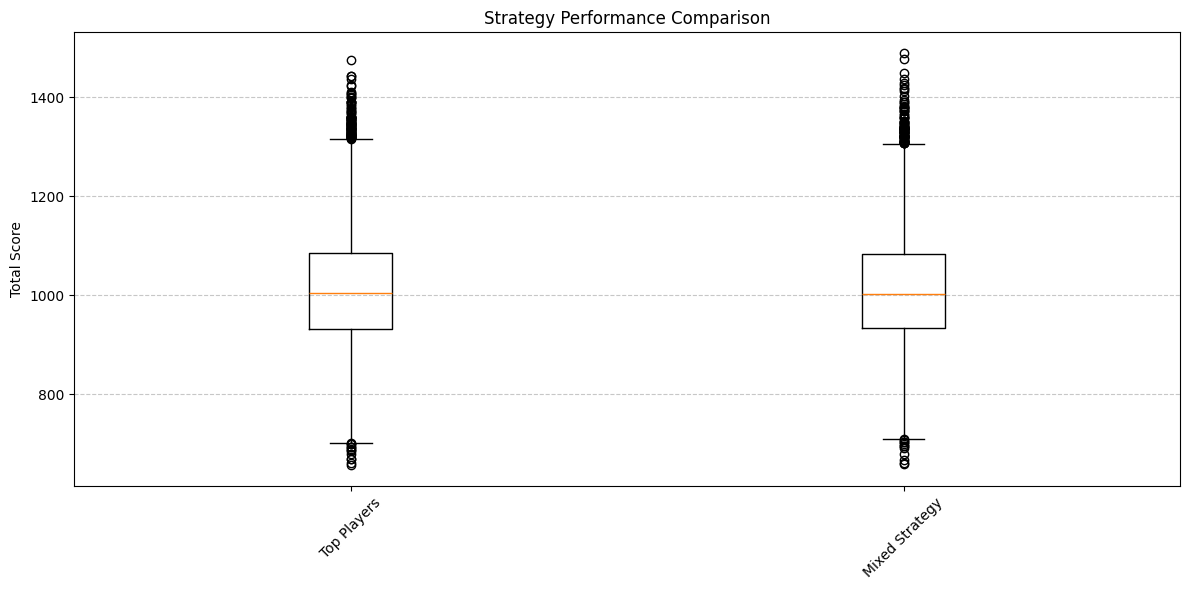

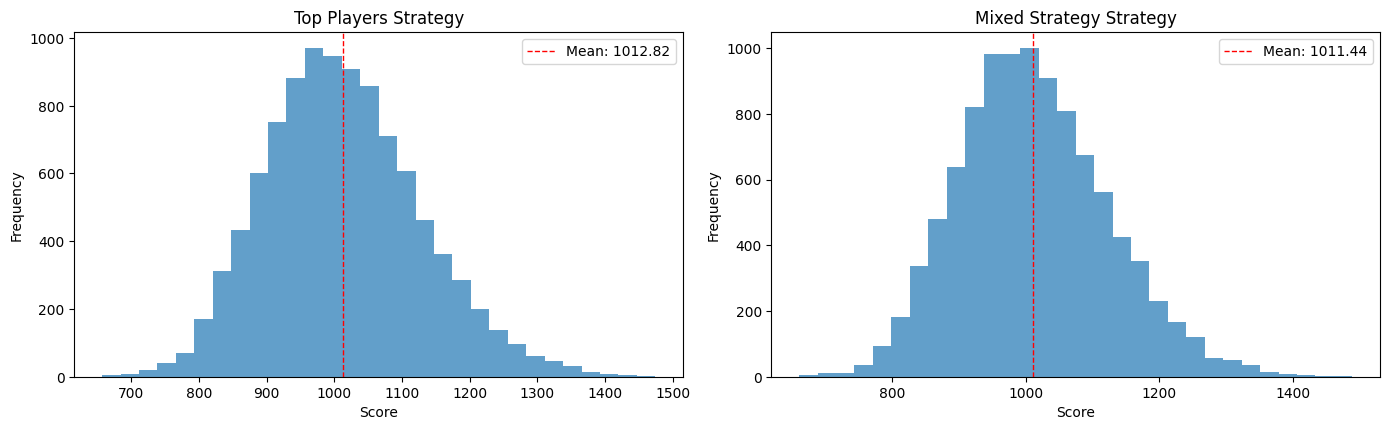

In [15]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import numpy as np
from select_strategy import score_strategy

# Let's create a few different strategies using the top players
# Strategy 1: Top 8 players
top_players_strategy = [(row['Team'], row['Player']) for _, row in player_stats_df.head(15).iterrows()]

# Strategy 2: Mix of top and mid-tier players (more diversified)
mixed_strategy = [(row['Team'], row['Player']) for _, row in player_stats_df.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15]].iterrows()]

# Strategy 3: Players from top-seeded teams (more likely to advance)

# Evaluate each strategy
strategies = {
    "Top Players": top_players_strategy,
    "Mixed Strategy": mixed_strategy,
    # "Top Seeds": top_seed_strategy,
    # "Balanced Seeds": balanced_strategy
}

results = {}
for name, strategy in strategies.items():
    print(f"\nEvaluating {name} strategy:")
    print("Players selected:")
    for team, player in strategy:
        print(f"  - {team}: {player}")
    
    # Score the strategy
    scores = score_strategy(strategy, sims)
    results[name] = scores
    
    # Calculate statistics
    mean_score = np.mean(scores)
    median_score = np.median(scores)
    std_dev = np.std(scores)
    
    print(f"Mean score: {mean_score:.2f}")
    print(f"Median score: {median_score:.2f}")
    print(f"Standard deviation: {std_dev:.2f}")
    print(f"Min score: {min(scores):.2f}")
    print(f"Max score: {max(scores):.2f}")

# Visualize the results with box plots
plt.figure(figsize=(12, 6))
plt.boxplot([results[name] for name in strategies.keys()], labels=strategies.keys())
plt.title('Strategy Performance Comparison')
plt.ylabel('Total Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Also create a histogram to see the distribution of scores for each strategy
plt.figure(figsize=(14, 8))
for i, (name, scores) in enumerate(results.items()):
    plt.subplot(2, 2, i+1)
    plt.hist(scores, bins=30, alpha=0.7)
    plt.title(f'{name} Strategy')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(scores), color='r', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(scores):.2f}')
    plt.legend()
plt.tight_layout()
plt.show()

In [16]:
import seaborn as sns

This code:
Creates a function analyze_player_performance that extracts a specific player's scores across all simulations
Analyzes the top player from your DataFrame (you can change this to any player you're interested in)
Calculates and displays key statistics for the player:
Mean score
Median score
Standard deviation
Min and max scores
Range of scores
Creates three visualizations:
A histogram with KDE overlay showing the distribution of the player's scores
A box plot showing the distribution in a more compact form
A violin plot comparing the distributions of the top 5 players
These visualizations will help you understand:
How consistent a player's performance is across simulations
The range of possible outcomes for that player
How the player compares to other top performers
Whether the player has a normal distribution or if there are multiple modes
This analysis can be particularly useful for identifying players who not only have high average scores but also consistent performance across different tournament scenarios.

Analyzing performance distribution for Zach Edey from Purdue
Statistics for Zach Edey:
Mean score: 78.37
Median score: 79.40
Standard deviation: 22.93
Min score: 12.23
Max score: 132.89
Range: 120.66


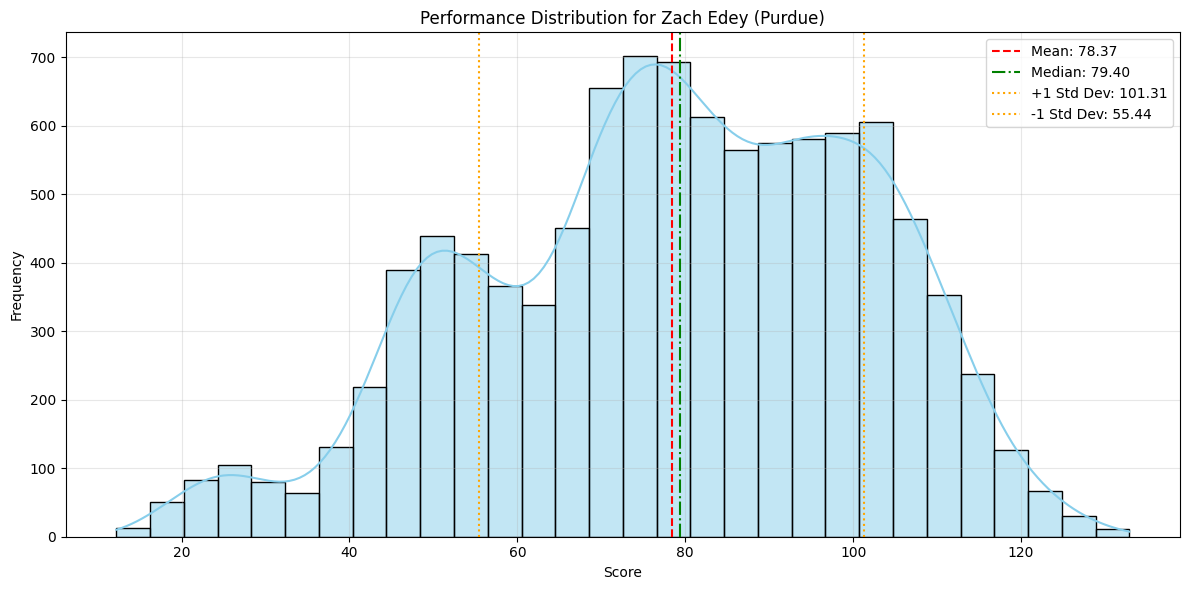

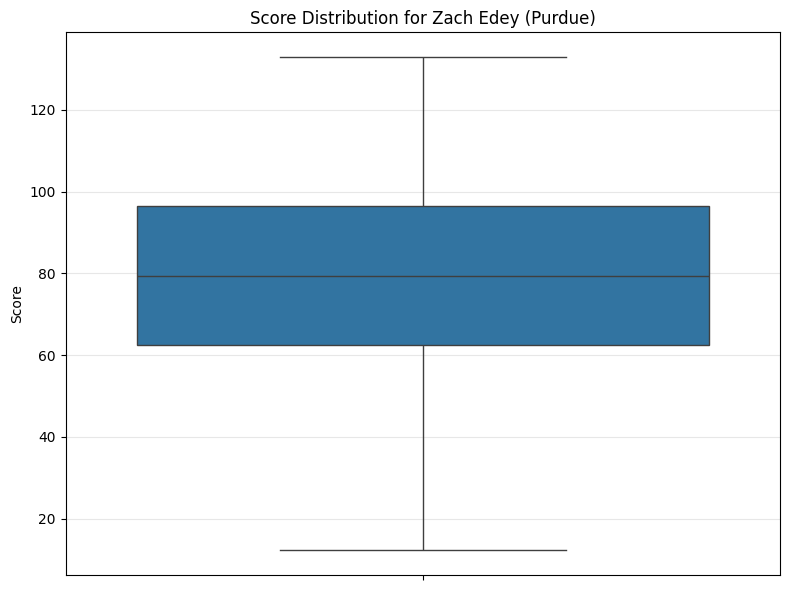

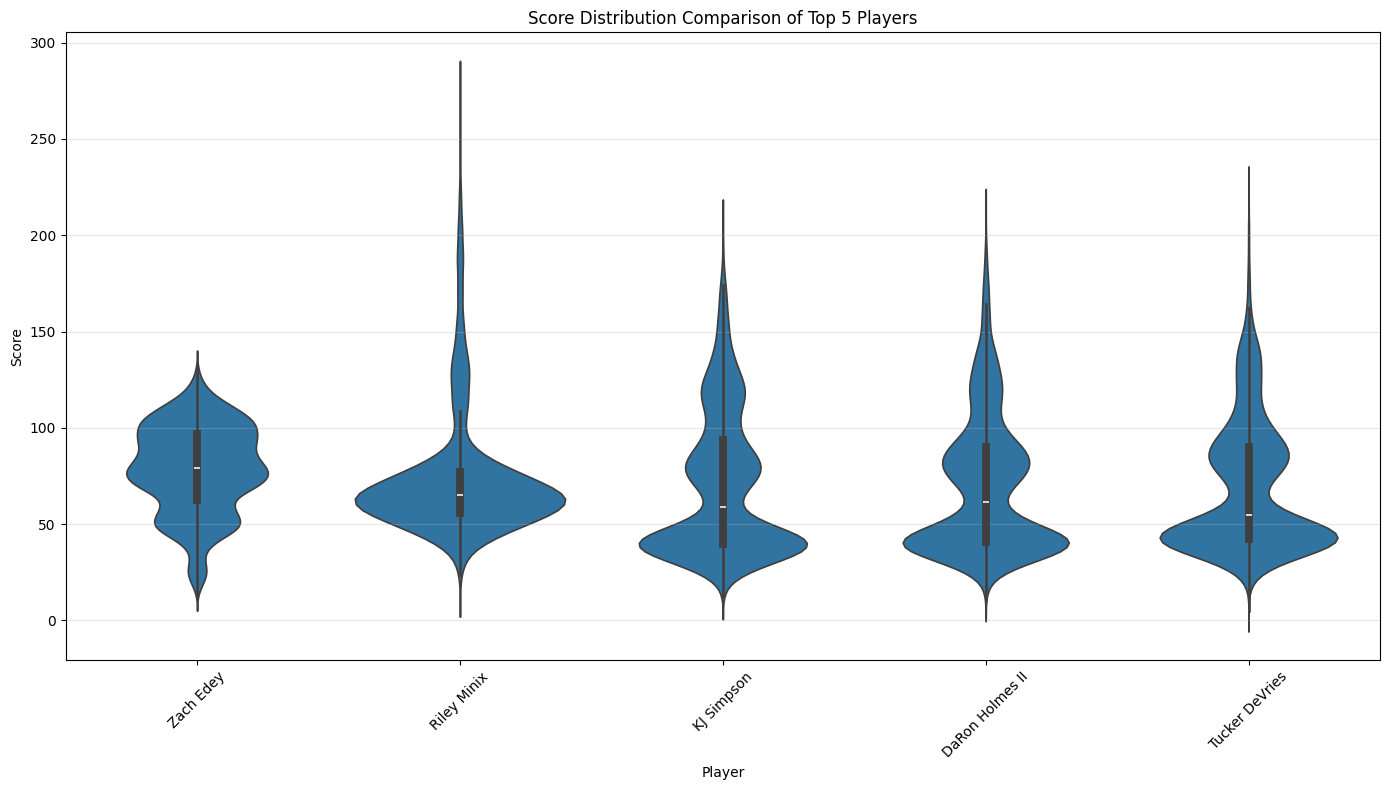

In [17]:
# Function to get a player's performance distribution across all simulations
def analyze_player_performance(team, player, sims):
    """
    Analyze a single player's performance across all simulations.
    
    Args:
        team (str): The team name
        player (str): The player name
        sims (list): List of simulation objects
    
    Returns:
        list: List of player's scores across all simulations
    """
    scores = []
    for sim in sims:
        try:
            # Extract player's score from this simulation
            player_score = sim.players_bookkeeping[team][player]['running_total']
            scores.append(player_score)
        except KeyError:
            # Handle case where player might not exist in some simulations
            print(f"Warning: {player} from {team} not found in a simulation")
            continue
    
    return scores

# Let's analyze a top player (you can change this to any player you're interested in)
# Get the top player from the DataFrame
top_player_row = player_stats_df.iloc[0]
team = top_player_row['Team']
player = top_player_row['Player']

print(f"Analyzing performance distribution for {player} from {team}")
player_scores = analyze_player_performance(team, player, sims)

# Calculate statistics
mean_score = np.mean(player_scores)
median_score = np.median(player_scores)
std_dev = np.std(player_scores)
min_score = min(player_scores)
max_score = max(player_scores)

print(f"Statistics for {player}:")
print(f"Mean score: {mean_score:.2f}")
print(f"Median score: {median_score:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Min score: {min_score:.2f}")
print(f"Max score: {max_score:.2f}")
print(f"Range: {max_score - min_score:.2f}")

# Create a histogram with KDE (Kernel Density Estimation) overlay
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(player_scores, kde=True, bins=30, color='skyblue')

# Add vertical lines for key statistics
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.2f}')
plt.axvline(median_score, color='green', linestyle='-.', label=f'Median: {median_score:.2f}')
plt.axvline(mean_score + std_dev, color='orange', linestyle=':', label=f'+1 Std Dev: {mean_score + std_dev:.2f}')
plt.axvline(mean_score - std_dev, color='orange', linestyle=':', label=f'-1 Std Dev: {mean_score - std_dev:.2f}')

plt.title(f'Performance Distribution for {player} ({team})')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Create a box plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y=player_scores)
plt.title(f'Score Distribution for {player} ({team})')
plt.ylabel('Score')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Compare with other top players
num_players_to_compare = 5
top_players = player_stats_df.head(num_players_to_compare)

comparison_data = []
for _, row in top_players.iterrows():
    team = row['Team']
    player = row['Player']
    scores = analyze_player_performance(team, player, sims)
    for score in scores:
        comparison_data.append({'Team': team, 'Player': player, 'Score': score})

comparison_df = pd.DataFrame(comparison_data)

# Create violin plot to compare distributions
plt.figure(figsize=(14, 8))
sns.violinplot(data=comparison_df, x='Player', y='Score', inner='box')
plt.title(f'Score Distribution Comparison of Top {num_players_to_compare} Players')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
import itertools

In [50]:
test1 = player_stats_df.head(5)
test2 = [(row['Team'], row['Player']) for _, row in test1.iterrows()]

for s in random.sample(list(itertools.combinations(test2, 3)), 5):
    for t, p in s:
        print (f"Team: {t}, Player: {p}")
    print("---")

Team: Colorado, Player: KJ Simpson
Team: Dayton, Player: DaRon Holmes II
Team: Drake, Player: Tucker DeVries
---
Team: Purdue, Player: Zach Edey
Team: Dayton, Player: DaRon Holmes II
Team: Drake, Player: Tucker DeVries
---
Team: Purdue, Player: Zach Edey
Team: Morehead State, Player: Riley Minix
Team: Colorado, Player: KJ Simpson
---
Team: Purdue, Player: Zach Edey
Team: Morehead State, Player: Riley Minix
Team: Dayton, Player: DaRon Holmes II
---
Team: Morehead State, Player: Riley Minix
Team: Colorado, Player: KJ Simpson
Team: Drake, Player: Tucker DeVries
---


100%|██████████| 100000/100000 [2:32:58<00:00, 10.89it/s] 


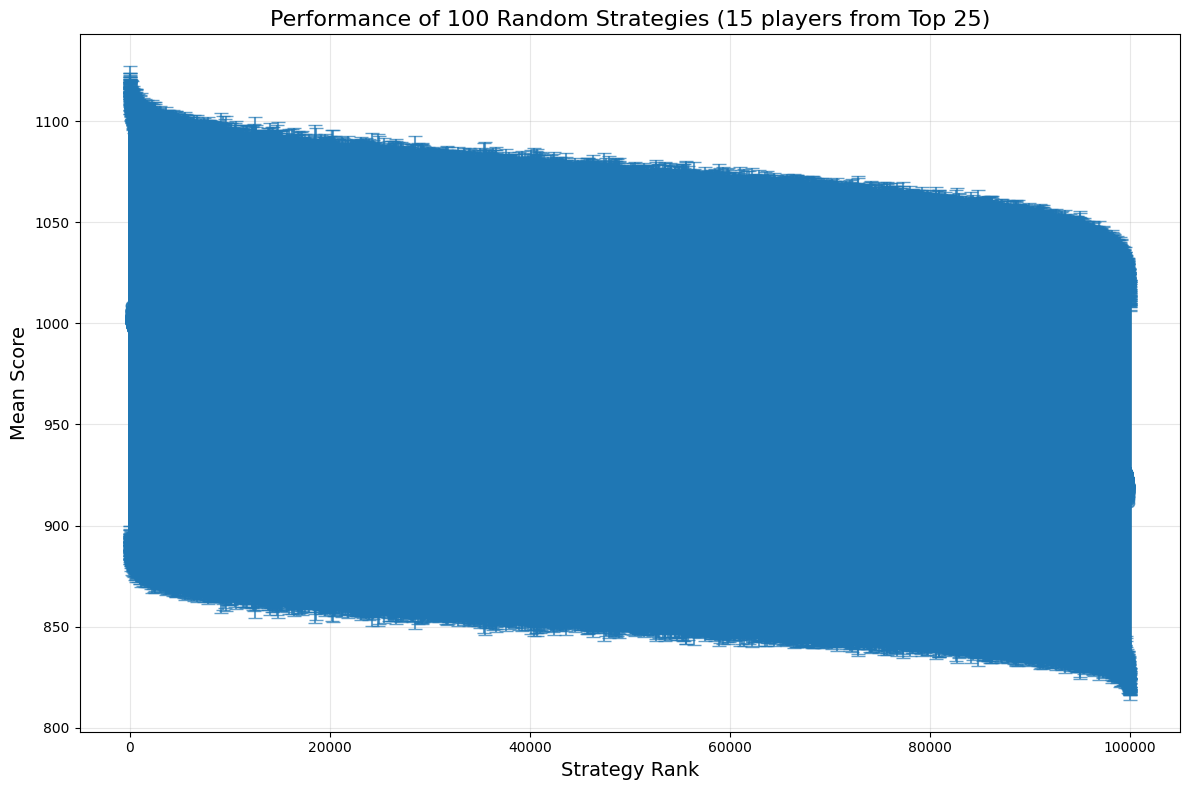

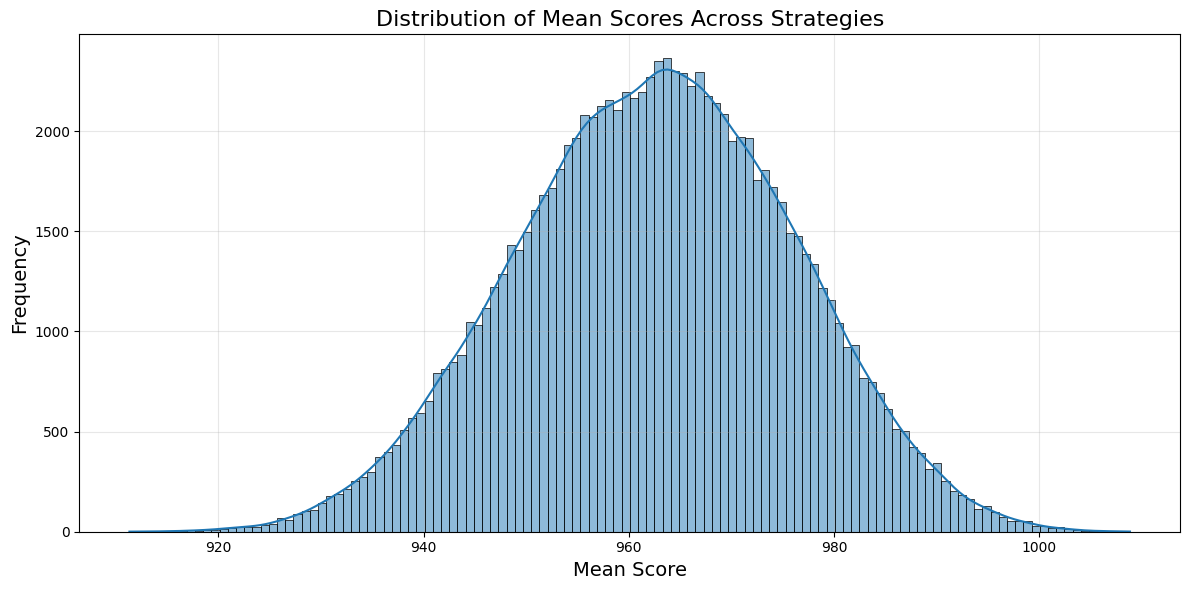

Top 10 Strategies by Mean Score:

Strategy 1 (Mean: 1008.84, Std: 114.06):
  Purdue          | Zach Edey            | Avg: 78.37
  Morehead State  | Riley Minix          | Avg: 73.61
  Colorado        | KJ Simpson           | Avg: 70.35
  Samford         | Achor Achor          | Avg: 68.79
  Akron           | Enrique Freeman      | Avg: 66.73
  Texas A&M       | Wade Taylor IV       | Avg: 62.00
  Florida         | Walter Clayton Jr.   | Avg: 61.50
  Tennessee       | Dalton Knecht        | Avg: 60.62
  Northwestern    | Boo Buie             | Avg: 60.38
  UNC             | RJ Davis             | Avg: 59.74
  BYU             | Jaxson Robinson      | Avg: 59.65
  Texas           | Max Abmas            | Avg: 59.41
  Illinois        | Terrence Shannon Jr. | Avg: 58.09
  Texas Tech      | Pop Isaacs           | Avg: 58.02
  Long Beach State | Marcus Tsohonis      | Avg: 57.90

Strategy 2 (Mean: 1008.65, Std: 110.49):
  Purdue          | Zach Edey            | Avg: 78.37
  Morehead State  

In [51]:
from select_strategy import score_strategy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

# Get the top 50 players from our dataframe
top_50_players = player_stats_df.head(50)
top_50_tuples = [(row['Team'], row['Player']) for _, row in top_50_players.iterrows()]
top_25_players = player_stats_df.head(25)
top_25_tuples = [(row['Team'], row['Player']) for _, row in top_25_players.iterrows()]

# generate all random combinations of 15 players from the top 25
top_25_combinations = random.sample(list(itertools.combinations(top_25_tuples, 15)), 100000)

# Function to generate a random strategy of 15 players from the top 50
def generate_random_strategy():
    # return random.sample(top_50_tuples, 15)
    return random.sample(top_25_tuples, 15)  # For a more conservative strategy, use top 25

# num_strategies = 100000
strategy_results = []

# for i in tqdm(range(num_strategies)):
for strategy in tqdm(top_25_combinations):
    scores = score_strategy(strategy, sims)
    
    # Calculate statistics for this strategy
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    min_score = np.min(scores)
    max_score = np.max(scores)
    
    strategy_results.append({
        'strategy_id': i,
        'strategy': strategy,
        'mean_score': mean_score,
        'std_score': std_score,
        'min_score': min_score,
        'max_score': max_score,
        'scores': scores
    })

# Convert results to DataFrame for easier analysis
strategy_df = pd.DataFrame([
    {
        'strategy_id': r['strategy_id'],
        'mean_score': r['mean_score'],
        'std_score': r['std_score'],
        'min_score': r['min_score'],
        'max_score': r['max_score']
    } for r in strategy_results
])

# Sort strategies by mean score
strategy_df = strategy_df.sort_values('mean_score', ascending=False).reset_index(drop=True)

# Visualize the results
plt.figure(figsize=(12, 8))

# Plot mean scores with error bars showing standard deviation
plt.errorbar(
    x=strategy_df.index,
    y=strategy_df['mean_score'],
    yerr=strategy_df['std_score'],
    fmt='o',
    alpha=0.7,
    capsize=5
)

plt.title(f'Performance of Random Strategies (15 players from Top {25})', fontsize=16)
plt.xlabel('Strategy Rank', fontsize=14)
plt.ylabel('Mean Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Histogram of mean scores
plt.figure(figsize=(12, 6))
sns.histplot(strategy_df['mean_score'], kde=True)
plt.title('Distribution of Mean Scores Across Strategies', fontsize=16)
plt.xlabel('Mean Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the top 5 strategies
print("Top 10 Strategies by Mean Score:")
for i in range(10):
    strategy_id = int(strategy_df.iloc[i]['strategy_id'])
    strategy = strategy_results[strategy_id]['strategy']
    mean_score = strategy_df.iloc[i]['mean_score']
    std_score = strategy_df.iloc[i]['std_score']
    
    print(f"\nStrategy {i+1} (Mean: {mean_score:.2f}, Std: {std_score:.2f}):")
    for team, player in strategy:
        # Find the player's average running total
        avg_total = player_stats_df[(player_stats_df['Team'] == team) & 
                                   (player_stats_df['Player'] == player)]['Average Running Total'].values[0]
        print(f"  {team:15s} | {player:20s} | Avg: {avg_total:.2f}")

In [23]:
strategy_df.head(10)['strategy_id']  # Display the top 10 strategies with their mean scores and standard deviations

0    30
1     5
2    89
3    70
4    98
5    35
6     7
7    79
8    44
9    74
Name: strategy_id, dtype: int64

In [52]:
strategy_results[30]['strategy']

(('Purdue', 'Zach Edey'),
 ('Morehead State', 'Riley Minix'),
 ('Colorado', 'KJ Simpson'),
 ('Drake', 'Tucker DeVries'),
 ('Stetson', 'Jalen Blackmon'),
 ('South Dakota State', 'Zeke Mayo'),
 ('Grand Canyon', 'Tyon Grant-Foster'),
 ('Texas A&M', 'Wade Taylor IV'),
 ('Florida', 'Walter Clayton Jr.'),
 ('UNC', 'RJ Davis'),
 ('Nevada', 'Jarod Lucas'),
 ('Texas', 'Max Abmas'),
 ('Illinois', 'Terrence Shannon Jr.'),
 ('NC State', 'DJ Horne'),
 ('Long Beach State', 'Marcus Tsohonis'))